In [1]:
# analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
import talib

In [2]:


data_path = 'data/Kraken_OHLCVT'
# full_path = data_path + table
# df = pd.read_csv(full_path, header=None)
# df

In [3]:
import os

file_names = os.listdir(data_path)

btc = [f for f in file_names if "BTC" in f]
# eth = [f for f in file_names if "ETH" in f.upper()]
# sol = [f for f in file_names if "SOL" in f.upper()]

In [4]:
df = pd.read_csv(data_path + "/XBTUSDC_1.csv", header=None)
# df["timestamp"] = pd.to_datetime(df[0], unit='s') 
# X = df[[4, 'timestamp']]
# X = df[[0, 4]]
df = df.drop(columns=[6])


#above march 9 for now
df = df[df[0] >= 1710028800]
df

,0,1,2,3,4,5
681154,1710028980,68469.45,68469.45,68469.45,68469.45,0.000100
681155,1710029040,68468.90,68468.90,68468.90,68468.90,0.001000
681156,1710029280,68474.69,68474.69,68474.69,68474.69,0.003078
681157,1710029340,68457.89,68459.92,68454.49,68459.92,0.007303
681158,1710029400,68458.29,68458.29,68458.29,68458.29,0.000455
...,...,...,...,...,...,...
780991,1727739840,63002.95,63002.95,63002.95,63002.95,0.002246
780992,1727739900,63023.75,63043.40,63023.75,63043.40,0.024866
780993,1727739960,63157.30,63161.83,63157.30,63161.83,0.003102
780994,1727740020,63215.71,63215.71,63215.71,63215.71,0.000800


In [5]:
x = df.to_numpy()

# Set print options for better readability
np.set_printoptions(precision=2, suppress=True)

# Pretty print the array
print("Formatted NumPy Array:")
print(x)

Formatted NumPy Array:
[[1.71e+09 6.85e+04 6.85e+04 6.85e+04 6.85e+04 1.00e-04]
 [1.71e+09 6.85e+04 6.85e+04 6.85e+04 6.85e+04 1.00e-03]
 [1.71e+09 6.85e+04 6.85e+04 6.85e+04 6.85e+04 3.08e-03]
 ...
 [1.73e+09 6.32e+04 6.32e+04 6.32e+04 6.32e+04 3.10e-03]
 [1.73e+09 6.32e+04 6.32e+04 6.32e+04 6.32e+04 8.00e-04]
 [1.73e+09 6.33e+04 6.33e+04 6.33e+04 6.33e+04 1.00e-04]]


In [6]:
#OVERLAP STUDIES:

def calculate_bollinger_bands(data, time_period=20):
    close = data[:, 4]  # Close prices
    upperband, middleband, lowerband = talib.BBANDS(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], upperband, middleband, lowerband))

def calculate_dema(data, time_period=30):
    close = data[:, 4]  # Close prices
    dema = talib.DEMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], dema))

def calculate_ema(data, time_period=30):
    close = data[:, 4]  # Close prices
    ema = talib.EMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], ema))

def calculate_hilbert_trendline(data):
    close = data[:, 4]  # Close prices
    h_trendline = talib.HT_TRENDLINE(close)
    return np.column_stack((data[:, 0], h_trendline))

def calculate_kamam(data, time_period=30):
    close = data[:, 4]  # Close prices
    kmam = talib.KAMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], kmam))

def calculate_midpoint(data, time_period=14):
    close = data[:, 4]  # Close prices
    midpoint = talib.MIDPOINT(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], midpoint))

def calculate_midprice(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]  # Low prices
    midprice = talib.MIDPRICE(high, low, timeperiod=time_period)
    return np.column_stack((data[:, 0], midprice))

def calculate_sar(data, acceleration=0.02, maximum=0.2):
    high = data[:, 2]  # High prices
    low = data[:, 3]  # Low prices
    sar = talib.SAR(high, low, acceleration=acceleration, maximum=maximum)
    return np.column_stack((data[:, 0], sar))

def calculate_sma(data, time_period=30):
    close = data[:, 4]  # Close prices
    sma = talib.SMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], sma))

def calculate_tema(data, time_period=30):
    close = data[:, 4]  # Close prices
    tema = talib.TEMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], tema))

def calculate_wma(data, time_period=30):
    close = data[:, 4]  # Close prices
    wma = talib.WMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], wma))

In [7]:
#momentum indicators:
def calculate_adx(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    adx = talib.ADX(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], adx))

def calculate_adxr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    adxr = talib.ADXR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], adxr))

def calculate_apO(data):
    close = data[:, 4] # Close prices
    apo = talib.APO(close)
    return np.column_stack((data[:, 0], apo))

def calculate_aroonosc(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    aroonosc = talib.AROONOSC(high, low)
    return np.column_stack((data[:, 0], aroonosc))

def calculate_bop(data):
    open_price = data[:, 1]  # Open prices
    high = data[:, 2]        # High prices
    low = data[:, 3]         # Low prices
    close = data[:, 4]       # Close prices
    bop = talib.BOP(open_price, high, low, close)
    return np.column_stack((data[:, 0], bop))

def calculate_cci(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    cci = talib.CCI(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], cci))

def calculate_cmo(data, time_period=14):
    close = data[:, 4]  # Close prices
    cmo = talib.CMO(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], cmo))

def calculate_dx(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    dx = talib.DX(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], dx))

def calculate_macd(data):
    close = data[:, 4]  # Close prices
    macd, macdsignal, macdhist = talib.MACD(close)
    return np.column_stack((data[:, 0], macd, macdsignal, macdhist))

def calculate_minus_di(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    minus_di = talib.MINUS_DI(high, low, close)
    return np.column_stack((data[:, 0], minus_di))

def calculate_minus_dm(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    minus_dm = talib.MINUS_DM(high, low)
    return np.column_stack((data[:, 0], minus_dm))

def calculate_momentum(data, time_period=10):
    close = data[:, 4]  # Close prices
    momentum = talib.MOM(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], momentum))

def calculate_plus_di(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    plus_di = talib.PLUS_DI(high, low, close)
    return np.column_stack((data[:, 0], plus_di))

def calculate_plus_dm(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    plus_dm = talib.PLUS_DM(high, low)
    return np.column_stack((data[:, 0], plus_dm))

def calculate_ppo(data):
    close = data[:, 4]  # Close prices
    ppo = talib.PPO(close)
    return np.column_stack((data[:, 0], ppo))

def calculate_roc(data, time_period=10):
    close = data[:, 4]  # Close prices
    roc = talib.ROC(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], roc))

def calculate_rocp(data):
    close = data[:, 4]  # Close prices
    rocp = talib.ROCP(close)
    return np.column_stack((data[:, 0], rocp))

def calculate_rocr(data):
    close = data[:, 4]  # Close prices
    rocr = talib.ROCR(close)
    return np.column_stack((data[:, 0], rocr))

def calculate_rocr100(data):
    close = data[:, 4]  # Close prices
    rocr100 = talib.ROCR100(close)
    return np.column_stack((data[:, 0], rocr100))

def calculate_rsi(data, time_period=14):
    close = data[:, 4]  # Close prices
    rsi = talib.RSI(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], rsi))

def calculate_stochastic(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    slowk, slowd = talib.STOCHF(high, low, close)
    return np.column_stack((data[:, 0], slowk, slowd))

def calculate_trix(data):
    close = data[:, 4]  # Close prices
    trix = talib.TRIX(close)
    return np.column_stack((data[:, 0], trix))

def calculate_ultosc(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    ultosc = talib.ULTOSC(high, low, close)
    return np.column_stack((data[:, 0], ultosc))

def calculate_willr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    willr = talib.WILLR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], willr))

In [8]:
#volatility indicators:

def calculate_atr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    atr = talib.ATR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], atr))

def calculate_natr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    natr = talib.NATR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], natr))

def calculate_trange(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    prev_close = np.roll(data[:, 4], 1)  # Previous close prices (shifted)
    prev_close[0] = low[0]  # Handle the first element
    true_range = np.maximum(high - low, np.maximum(np.abs(high - prev_close), np.abs(low - prev_close)))
    return np.column_stack((data[:, 0], true_range))

# Example usage:
# data = np.array([[timestamp, open, high, low, close, volume], ...])
# atr_result = calculate_atr(data)
# natr_result = calculate_natr(data)
# trange_result = calculate_trange(data)


In [9]:
# PATTERN RECOGNITION:
import numpy as np
# import talib

def calculate_two_crows(data):
    two_crows = talib.CDL2CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], two_crows))

def calculate_three_black_crows(data):
    three_black_crows = talib.CDL3BLACKCROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_black_crows))

def calculate_three_inside(data):
    three_inside = talib.CDL3INSIDE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_inside))

def calculate_three_line_strike(data):
    three_line_strike = talib.CDL3LINESTRIKE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_line_strike))

def calculate_three_outside(data):
    three_outside = talib.CDL3OUTSIDE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_outside))

def calculate_three_stars_in_south(data):
    three_stars_in_south = talib.CDL3STARSINSOUTH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_stars_in_south))

def calculate_three_advancing_white(data):
    three_advancing_white = talib.CDL3WHITESOLDIERS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_advancing_white))

def calculate_abandoned_baby(data):
    abandoned_baby = talib.DLABANDONEDBABY(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], abandoned_baby))

def calculate_advance_block(data):
    advance_block = talib.CDLADVANCEBLOCK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], advance_block))

def calculate_belt_hold(data):
    belt_hold = talib.CDLBELTHOLD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], belt_hold))

def calculate_breakaway(data):
    breakaway = talib.CDLBREAKAWAY(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], breakaway))

def calculate_closing_marubozu(data):
    closing_marubozu = talib.CDLCLOSINGMARUBOZU(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], closing_marubozu))

def calculate_concealing_baby_swallow(data):
    concealing_baby_swallow = talib.DLCONCEALBABYSWALL(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], concealing_baby_swallow))

def calculate_counterattack(data):
    counterattack = talib.CDLCOUNTERATTACK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], counterattack))

def calculate_dark_cloud_cover(data):
    dark_cloud_cover = talib.CLDARKCLOUDCOVER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], dark_cloud_cover))

def calculate_doji(data):
    doji = talib.DLDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], doji))

def calculate_doji_star(data):
    doji_star = talib.CDLDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], doji_star))

def calculate_dragonfly_doji(data):
    dragonfly_doji = talib.DLDRAGONFLYDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], dragonfly_doji))

def calculate_engulfing(data):
    engulfing = talib.DLENGULFING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], engulfing))

def calculate_evening_doji_star(data):
    evening_doji_star = talib.CDLEVENINGDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], evening_doji_star))

def calculate_evening_star(data):
    evening_star = talib.CDLEVENINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], evening_star))

def calculate_up_down_gap_side(data):
    up_down_gap_side = talib.CDLGAPSIDESIDEWHITE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], up_down_gap_side))

def calculate_gravestone_doji(data):
    gravestone_doji = talib.CDLGRAVESTONEDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], gravestone_doji))

def calculate_hammer(data):
    hammer = talib.CDLHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hammer))

def calculate_hanging_man(data):
    hanging_man = talib.CDLHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hanging_man))

def calculate_harami(data):
    harami = talib.CDLHARAMI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], harami))

def calculate_harami_cross(data):
    harami_cross = talib.DLHARAMICROSS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], harami_cross))

def calculate_high_wave(data):
    high_wave = talib.CDLHIGHWAVE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], high_wave))

def calculate_hikkake(data):
    hikkake = talib.CDLHIKKAKE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hikkake))

def calculate_modified_hikkake(data):
    modified_hikkake = talib.CDLHIKKAKEMOD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], modified_hikkake))

def calculate_homing_pigeon(data):
    homing_pigeon = talib.CDLHOMINGPIGEON(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], homing_pigeon))

def calculate_identical_three_crows(data):
    identical_three_crows = talib.CDLIDENTICAL3CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], identical_three_crows))

def calculate_in_neck(data):
    in_neck = talib.CDLINNECK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], in_neck))

def calculate_inverted_hammer(data):
    inverted_hammer = talib.DLINVERTEDHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], inverted_hammer))

def calculate_kicking(data):
    kicking = talib.DLKICKING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], kicking))

def calculate_kicking_by_length(data):
    kicking_by_length = talib.CDLKICKINGBYLENGTH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], kicking_by_length))

def calculate_ladder_bottom(data):
    ladder_bottom = talib.CDLLADDERBOTTOM(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], ladder_bottom))

def calculate_long_legged_doji(data):
    long_legged_doji = talib.CDLLONGLEGGEDDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], long_legged_doji))

def calculate_long_line(data):
    long_line = talib.CDLLONGLINE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], long_line))

def calculate_marubozu(data):
    marubozu = talib.CDLMARUBOZU(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], marubozu))

def calculate_matching_low(data):
    matching_low = talib.CDLMATCHINGLOW(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], matching_low))

def calculate_mat_hold(data):
    mat_hold = talib.CDLMATHOLD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], mat_hold))

def calculate_morning_doji_star(data):
    morning_doji_star = talib.CDLMORNINGDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], morning_doji_star))

def calculate_morning_star(data):
    morning_star = talib.CDLMORNINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], morning_star))

def calculate_on_neck(data):
    on_neck = talib.CDLONNECK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], on_neck))

def calculate_piercing(data):
    piercing = talib.CDLPIERCING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], piercing))

def calculate_rickshaw_man(data):
    rickshaw_man = talib.DLRICKSHAWMAN(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], rickshaw_man))

def calculate_rising_falling_three_methods(data):
    rising_falling_three_methods = talib.CDLRISEFALL3METHODS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], rising_falling_three_methods))

def calculate_separating_lines(data):
    separating_lines = talib.CDLSEPARATINGLINES(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], separating_lines))

def calculate_shooting_star(data):
    shooting_star = talib.CDLSHOOTINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], shooting_star))

def calculate_short_line(data):
    short_line = talib.CDLSHORTLINE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], short_line))

def calculate_spinning_top(data):
    spinning_top = talib.CDLSPINNINGTOP(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], spinning_top))

def calculate_stalled_pattern(data):
    stalled_pattern = talib.CDLSTALLEDPATTERN(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], stalled_pattern))

def calculate_stick_sandwich(data):
    stick_sandwich = talib.CDLSTICKSANDWICH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], stick_sandwich))

def calculate_takuri(data):
    takuri = talib.CDLTAKURI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], takuri))

def calculate_tasuki_gap(data):
    tasuki_gap = talib.CDLTASUKIGAP(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], tasuki_gap))

def calculate_thrusting(data):
    thrusting = talib.CDLTHRUSTING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], thrusting))

def calculate_tristar(data):
    tristar = talib.DLTRISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], tristar))

def calculate_unique_three_river(data):
    unique_three_river = talib.CDLUNIQUE3RIVER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], unique_three_river))

def calculate_upside_gap_two_crows(data):
    upside_gap_two_crows = talib.CDLUPSIDEGAP2CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], upside_gap_two_crows))

def calculate_upside_downside_gap_three_methods(data):
    upside_downside_gap_three_methods = talib.CDLXSIDEGAP3METHODS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], upside_downside_gap_three_methods))

# Example usage:
# data = np.array([[timestamp, open, high, low, close, volume], ...])
# two_crows_result = calculate_two_crows(data)
# three_black_crows_result = calculate_three_black_crows(data)


In [10]:
#CYCLE INDICATORS:
import numpy as np


def calculate_hilbert_transform_dominant_cycle_period(data):
    """
    Calculates the Hilbert Transform - Dominant Cycle Period.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated cycle period.
    """
    dcp = talib.HT_DCPERIOD(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], dcp))

def calculate_hilbert_transform_dominant_cycle_phase(data):
    """
    Calculates the Hilbert Transform - Dominant Cycle Phase.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated cycle phase.
    """
    dph = talib.HT_DCPHASE(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], dph))

def calculate_hilbert_transform_trend_mode(data):
    """
    Calculates the Hilbert Transform - Trend vs Cycle Mode.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated trend mode.
    """
    trend_mode = talib.HT_TRENDMODE(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], trend_mode))


In [11]:

functions = [name for name, obj in globals().items() if callable(obj)]
technicals = [f for f in functions if "calculate" in f]

for t in technicals:
    name = ''.join(t.split("_")[1:])

    print(f'{name} = {t}(x)')



bollingerbands = calculate_bollinger_bands(x)
dema = calculate_dema(x)
ema = calculate_ema(x)
hilberttrendline = calculate_hilbert_trendline(x)
kamam = calculate_kamam(x)
midpoint = calculate_midpoint(x)
midprice = calculate_midprice(x)
sar = calculate_sar(x)
sma = calculate_sma(x)
tema = calculate_tema(x)
wma = calculate_wma(x)
adx = calculate_adx(x)
adxr = calculate_adxr(x)
apO = calculate_apO(x)
aroonosc = calculate_aroonosc(x)
bop = calculate_bop(x)
cci = calculate_cci(x)
cmo = calculate_cmo(x)
dx = calculate_dx(x)
macd = calculate_macd(x)
minusdi = calculate_minus_di(x)
minusdm = calculate_minus_dm(x)
momentum = calculate_momentum(x)
plusdi = calculate_plus_di(x)
plusdm = calculate_plus_dm(x)
ppo = calculate_ppo(x)
roc = calculate_roc(x)
rocp = calculate_rocp(x)
rocr = calculate_rocr(x)
rocr100 = calculate_rocr100(x)
rsi = calculate_rsi(x)
stochastic = calculate_stochastic(x)
trix = calculate_trix(x)
ultosc = calculate_ultosc(x)
willr = calculate_willr(x)
atr = calculate_atr(x)
na

In [12]:
bollingerbands = calculate_bollinger_bands(x)
dema = calculate_dema(x)
ema = calculate_ema(x)
hilberttrendline = calculate_hilbert_trendline(x)
kamam = calculate_kamam(x)
midpoint = calculate_midpoint(x)
midprice = calculate_midprice(x)
sar = calculate_sar(x)
sma = calculate_sma(x)
tema = calculate_tema(x)
wma = calculate_wma(x)
adx = calculate_adx(x)
adxr = calculate_adxr(x)
apO = calculate_apO(x)
aroonosc = calculate_aroonosc(x)
bop = calculate_bop(x)
cci = calculate_cci(x)
cmo = calculate_cmo(x)
dx = calculate_dx(x)
macd = calculate_macd(x)
minusdi = calculate_minus_di(x)
minusdm = calculate_minus_dm(x)
momentum = calculate_momentum(x)
plusdi = calculate_plus_di(x)
plusdm = calculate_plus_dm(x)
ppo = calculate_ppo(x)
roc = calculate_roc(x)
rocp = calculate_rocp(x)
rocr = calculate_rocr(x)
rocr100 = calculate_rocr100(x)
rsi = calculate_rsi(x)
stochastic = calculate_stochastic(x)
trix = calculate_trix(x)
ultosc = calculate_ultosc(x)
willr = calculate_willr(x)
atr = calculate_atr(x)
natr = calculate_natr(x)
trange = calculate_trange(x)
twocrows = calculate_two_crows(x)
threeblackcrows = calculate_three_black_crows(x)
threeinside = calculate_three_inside(x)
threelinestrike = calculate_three_line_strike(x)
threeoutside = calculate_three_outside(x)
threestarsinsouth = calculate_three_stars_in_south(x)
threeadvancingwhite = calculate_three_advancing_white(x)
# abandonedbaby = calculate_abandoned_baby(x)
advanceblock = calculate_advance_block(x)
belthold = calculate_belt_hold(x)
breakaway = calculate_breakaway(x)
closingmarubozu = calculate_closing_marubozu(x)
# concealingbabyswallow = calculate_concealing_baby_swallow(x)
counterattack = calculate_counterattack(x)
# darkcloudcover = calculate_dark_cloud_cover(x)
# doji = calculate_doji(x)
dojistar = calculate_doji_star(x)
# dragonflydoji = calculate_dragonfly_doji(x)
# engulfing = calculate_engulfing(x)
eveningdojistar = calculate_evening_doji_star(x)
eveningstar = calculate_evening_star(x)
updowngapside = calculate_up_down_gap_side(x)
gravestonedoji = calculate_gravestone_doji(x)
hammer = calculate_hammer(x)
hangingman = calculate_hanging_man(x)
harami = calculate_harami(x)
# haramicross = calculate_harami_cross(x)
highwave = calculate_high_wave(x)
hikkake = calculate_hikkake(x)
modifiedhikkake = calculate_modified_hikkake(x)
homingpigeon = calculate_homing_pigeon(x)
identicalthreecrows = calculate_identical_three_crows(x)
inneck = calculate_in_neck(x)
# invertedhammer = calculate_inverted_hammer(x)
# kicking = calculate_kicking(x)
kickingbylength = calculate_kicking_by_length(x)
ladderbottom = calculate_ladder_bottom(x)
longleggeddoji = calculate_long_legged_doji(x)
longline = calculate_long_line(x)
marubozu = calculate_marubozu(x)
matchinglow = calculate_matching_low(x)
mathold = calculate_mat_hold(x)
morningdojistar = calculate_morning_doji_star(x)
morningstar = calculate_morning_star(x)
onneck = calculate_on_neck(x)
piercing = calculate_piercing(x)
# rickshawman = calculate_rickshaw_man(x)
risingfallingthreemethods = calculate_rising_falling_three_methods(x)
separatinglines = calculate_separating_lines(x)
shootingstar = calculate_shooting_star(x)
shortline = calculate_short_line(x)
spinningtop = calculate_spinning_top(x)
stalledpattern = calculate_stalled_pattern(x)
sticksandwich = calculate_stick_sandwich(x)
takuri = calculate_takuri(x)
tasukigap = calculate_tasuki_gap(x)
thrusting = calculate_thrusting(x)
# tristar = calculate_tristar(x)
uniquethreeriver = calculate_unique_three_river(x)
upsidegaptwocrows = calculate_upside_gap_two_crows(x)
upsidedownsidegapthreemethods = calculate_upside_downside_gap_three_methods(x)
hilberttransformdominantcycleperiod = calculate_hilbert_transform_dominant_cycle_period(x)
hilberttransformdominantcyclephase = calculate_hilbert_transform_dominant_cycle_phase(x)
hilberttransformtrendmode = calculate_hilbert_transform_trend_mode(x)


In [13]:
import numpy as np
import pandas as pd

# Assuming x is your initial data array and you've computed your indicators as shown.
# Example: bollingerbands, dema, ema, etc. are already calculated numpy arrays.

# Create a dictionary to hold the dataframes
dfs = {
    "bollingerbands": calculate_bollinger_bands(x),
    "dema": calculate_dema(x),
    "ema": calculate_ema(x),
    "hilberttrendline": calculate_hilbert_trendline(x),
    "kamam": calculate_kamam(x),
    "midpoint": calculate_midpoint(x),
    "midprice": calculate_midprice(x),
    "sar": calculate_sar(x),
    "sma": calculate_sma(x),
    "tema": calculate_tema(x),
    "wma": calculate_wma(x),
    "adx": calculate_adx(x),
    "adxr": calculate_adxr(x),
    "apo": calculate_apO(x),
    "aroonosc": calculate_aroonosc(x),
    "bop": calculate_bop(x),
    "cci": calculate_cci(x),
    "cmo": calculate_cmo(x),
    "dx": calculate_dx(x),
    "macd": calculate_macd(x),
    "minusdi": calculate_minus_di(x),
    "minusdm": calculate_minus_dm(x),
    "momentum": calculate_momentum(x),
    "plusdi": calculate_plus_di(x),
    "plusdm": calculate_plus_dm(x),
    "ppo": calculate_ppo(x),
    "roc": calculate_roc(x),
    "rocp": calculate_rocp(x),
    "rocr": calculate_rocr(x),
    "rocr100": calculate_rocr100(x),
    "rsi": calculate_rsi(x),
    "stochastic": calculate_stochastic(x),
    "trix": calculate_trix(x),
    "ultosc": calculate_ultosc(x),
    "willr": calculate_willr(x),
    "atr": calculate_atr(x),
    "natr": calculate_natr(x),
    "trange": calculate_trange(x),
    "twocrows": calculate_two_crows(x),
    "threeblackcrows": calculate_three_black_crows(x),
    "threeinside": calculate_three_inside(x),
    "threelinestrike": calculate_three_line_strike(x),
    "threeoutside": calculate_three_outside(x),
    "threestarsinsouth": calculate_three_stars_in_south(x),
    "threeadvancingwhite": calculate_three_advancing_white(x),
    "advanceblock": calculate_advance_block(x),
    "belthold": calculate_belt_hold(x),
    "breakaway": calculate_breakaway(x),
    "closingmarubozu": calculate_closing_marubozu(x),
    "counterattack": calculate_counterattack(x),
    "dojistar": calculate_doji_star(x),
    "eveningdojistar": calculate_evening_doji_star(x),
    "eveningstar": calculate_evening_star(x),
    "updowngapside": calculate_up_down_gap_side(x),
    "gravestonedoji": calculate_gravestone_doji(x),
    "hammer": calculate_hammer(x),
    "hangingman": calculate_hanging_man(x),
    "harami": calculate_harami(x),
    "kickingbylength": calculate_kicking_by_length(x),
    "ladderbottom": calculate_ladder_bottom(x),
    "longleggeddoji": calculate_long_legged_doji(x),
    "longline": calculate_long_line(x),
    "marubozu": calculate_marubozu(x),
    "matchinglow": calculate_matching_low(x),
    "mathold": calculate_mat_hold(x),
    "morningdojistar": calculate_morning_doji_star(x),
    "morningstar": calculate_morning_star(x),
    "onneck": calculate_on_neck(x),
    "piercing": calculate_piercing(x),
    "risingfallingthreemethods": calculate_rising_falling_three_methods(x),
    "separatinglines": calculate_separating_lines(x),
    "shootingstar": calculate_shooting_star(x),
    "shortline": calculate_short_line(x),
    "spinningtop": calculate_spinning_top(x),
    "stalledpattern": calculate_stalled_pattern(x),
    "sticksandwich": calculate_stick_sandwich(x),
    "takuri": calculate_takuri(x),
    "tasukigap": calculate_tasuki_gap(x),
    "thrusting": calculate_thrusting(x),
    "uniquethreeriver": calculate_unique_three_river(x),
    "upsidegaptwocrows": calculate_upside_gap_two_crows(x),
    "upsidedownsidegapthreemethods": calculate_upside_downside_gap_three_methods(x),
    "hilberttransformdominantcycleperiod": calculate_hilbert_transform_dominant_cycle_period(x),
    "hilberttransformdominantcyclephase": calculate_hilbert_transform_dominant_cycle_phase(x),
    "hilberttransformtrendmode": calculate_hilbert_transform_trend_mode(x)
}

# Start with the first DataFrame (assuming the first calculated indicator has data)
merged_df = pd.DataFrame(dfs["bollingerbands"])

# Merge each DataFrame on the timestamp
for key, value in dfs.items():
    if key != "bollingerbands":  # Skip the first since it's already merged
        temp_df = pd.DataFrame(value)
        
        # Rename columns to avoid conflicts
        temp_df.columns = [f"{key}_{col}" if col != temp_df.columns[0] else col for col in temp_df.columns]
        
        # Merge on the timestamp
        merged_df = pd.merge(merged_df, temp_df, on=merged_df.columns[0], how='outer')

# Optionally sort by timestamp
merged_df.sort_values(by=merged_df.columns[0], inplace=True)

# Reset index if needed
merged_df.reset_index(drop=True, inplace=True)

# Display the final merged DataFrame
# print(merged_df)


In [14]:
merged_df['timestamp'] = merged_df[0]

In [15]:
# Create DataFrame with specified column names
prices = pd.DataFrame(x, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# prices


In [16]:
df = pd.merge(prices, merged_df, on='timestamp', how='inner', suffixes=('_price', '_indicator'))

# df

In [17]:
df['returns'] = df['close'].pct_change()  # or df['close'].diff() / df['close'].shift(1)

In [22]:
df['next_returns'] = df['returns'].shift(-1)
df = df.iloc[:-1]
df

,timestamp,open,high,low,close,volume,0,1,2,3,...,tasukigap_1,thrusting_1,uniquethreeriver_1,upsidegaptwocrows_1,upsidedownsidegapthreemethods_1,hilberttransformdominantcycleperiod_1,hilberttransformdominantcyclephase_1,hilberttransformtrendmode_1,returns,next_returns
0,1.710029e+09,68469.45,68469.45,68469.45,68469.45,0.000100,1.710029e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,-0.000008
1,1.710029e+09,68468.90,68468.90,68468.90,68468.90,0.001000,1.710029e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,-0.000008,0.000085
2,1.710029e+09,68474.69,68474.69,68474.69,68474.69,0.003078,1.710029e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.000085,-0.000216
3,1.710029e+09,68457.89,68459.92,68454.49,68459.92,0.007303,1.710029e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,-0.000216,-0.000024
4,1.710029e+09,68458.29,68458.29,68458.29,68458.29,0.000455,1.710029e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,-0.000024,-0.000193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99836,1.727740e+09,62939.01,62939.01,62900.00,62900.00,0.050496,1.727740e+09,63720.507495,63325.0760,62929.644505,...,0.0,0.0,0.0,0.0,0.0,30.760766,-10.179717,1.0,-0.000794,0.001637
99837,1.727740e+09,63002.95,63002.95,63002.95,63002.95,0.002246,1.727740e+09,63710.701909,63300.2085,62889.715091,...,0.0,0.0,0.0,0.0,0.0,29.017522,-20.951519,1.0,0.001637,0.000642
99838,1.727740e+09,63023.75,63043.40,63023.75,63043.40,0.024866,1.727740e+09,63705.038238,63282.4965,62859.954762,...,0.0,0.0,0.0,0.0,0.0,27.594143,-25.565954,1.0,0.000642,0.001879
99839,1.727740e+09,63157.30,63161.83,63157.30,63161.83,0.003102,1.727740e+09,63696.900386,63272.7060,62848.511614,...,0.0,0.0,0.0,0.0,0.0,26.711891,-23.962814,1.0,0.001879,0.000853


In [24]:
data = df.drop(columns = ['open', 'high', 'low', 'close', 'volume', 0, 1, 2, 3])
data.dropna(how='any', inplace=True)
X = data.drop(columns = ['returns', 'next_returns'])
y = data[['timestamp', 'next_returns']]
X.head()

,timestamp,dema_1,ema_1,hilberttrendline_1,kamam_1,midpoint_1,midprice_1,sar_1,sma_1,tema_1,...,sticksandwich_1,takuri_1,tasukigap_1,thrusting_1,uniquethreeriver_1,upsidegaptwocrows_1,upsidedownsidegapthreemethods_1,hilberttransformdominantcycleperiod_1,hilberttransformdominantcyclephase_1,hilberttransformtrendmode_1
88,1.710043e+09,69119.661671,69083.812751,69071.040969,69117.665120,69124.080,69124.080,68896.731200,69105.191667,69101.490305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.021081,119.654132,0.0
89,1.710044e+09,69144.309160,69097.742251,69065.240269,69123.040370,69152.555,69152.555,68911.551152,69113.935000,69137.336645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.996310,137.892332,0.0
90,1.710044e+09,69206.865020,69131.615009,69072.447318,69149.319272,69333.905,69322.200,68934.841283,69129.127000,69227.174925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.033637,147.013534,0.0
91,1.710044e+09,69255.167932,69159.079847,69088.606091,69162.961693,69337.165,69337.165,68989.875580,69140.056000,69293.661202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.144947,156.411390,0.0
92,1.710044e+09,69304.567055,69187.805663,69113.149768,69178.693890,69345.120,69345.120,69040.507134,69151.676000,69359.916433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.394233,154.034542,0.0


In [33]:
X.reset_index(inplace=True)
X.drop(columns=['index'], inplace=True)

In [32]:
y.reset_index(inplace=True)
y.drop(columns=['index'], inplace=True)


In [34]:

from sklearn.preprocessing import StandardScaler

timestamps = X['timestamp'].values  # Extract timestamp
features = X.drop(columns=['timestamp'])

# Step 2: Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Combine the scaled features with the timestamp
scaled_df = pd.DataFrame(scaled_features)
# scaled_df['timestamp'] = timestamps  # Add the timestamp back

# Display the result
# print(scaled_df)


In [35]:

# scaled_df['timestamp'] = X['timestamp']
# scaled_df

In [36]:
X

,level_0,timestamp,dema_1,ema_1,hilberttrendline_1,kamam_1,midpoint_1,midprice_1,sar_1,sma_1,...,sticksandwich_1,takuri_1,tasukigap_1,thrusting_1,uniquethreeriver_1,upsidegaptwocrows_1,upsidedownsidegapthreemethods_1,hilberttransformdominantcycleperiod_1,hilberttransformdominantcyclephase_1,hilberttransformtrendmode_1
0,0,1.710043e+09,69119.661671,69083.812751,69071.040969,69117.665120,69124.080,69124.080,68896.731200,69105.191667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.021081,119.654132,0.0
1,1,1.710044e+09,69144.309160,69097.742251,69065.240269,69123.040370,69152.555,69152.555,68911.551152,69113.935000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.996310,137.892332,0.0
2,2,1.710044e+09,69206.865020,69131.615009,69072.447318,69149.319272,69333.905,69322.200,68934.841283,69129.127000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.033637,147.013534,0.0
3,3,1.710044e+09,69255.167932,69159.079847,69088.606091,69162.961693,69337.165,69337.165,68989.875580,69140.056000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.144947,156.411390,0.0
4,4,1.710044e+09,69304.567055,69187.805663,69113.149768,69178.693890,69345.120,69345.120,69040.507134,69151.676000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.394233,154.034542,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99748,99748,1.727740e+09,63179.486833,63361.638552,63466.261132,63202.109929,63230.935,63230.935,63371.690636,63420.596333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.760766,-10.179717,1.0
99749,99749,1.727740e+09,63146.449143,63338.497355,63427.102853,63176.436770,63225.290,63225.290,63305.653947,63397.658667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.017522,-20.951519,1.0
99750,99750,1.727740e+09,63121.990565,63319.458816,63389.563903,63159.356649,63201.225,63201.225,63248.862394,63374.759000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.594143,-25.565954,1.0
99751,99751,1.727740e+09,63115.047354,63309.289215,63356.738925,63159.566420,63200.150,63200.150,63200.021659,63355.658000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.711891,-23.962814,1.0


In [37]:
# if y['timestamp'] == X['timestamp']:
scaled_df = pd.concat([y['next_returns'], scaled_df], axis=1)
scaled_df = pd.concat([X['timestamp'], scaled_df], axis=1)
# else:
#     raise 

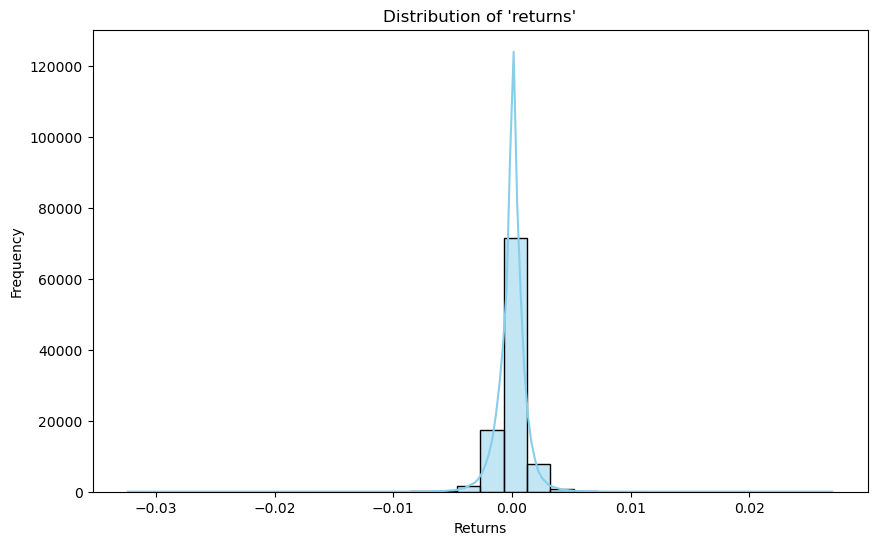

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'returns'
plt.figure(figsize=(10, 6))
sns.histplot(scaled_df['next_returns'], kde=True, bins=30, color='skyblue')  # histogram with KDE overlay
plt.title("Distribution of 'returns'")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()


In [39]:
# Use qcut to divide 'returns' into 11 equal-sized groups and label them from 1 to 11
scaled_df['return_group'] = pd.qcut(scaled_df['next_returns'], q=11, labels=range(1, 11 + 1))

# Display the DataFrame with the new 'return_group' column
scaled_df.groupby('return_group').size()

return_group
1      9069
2      9068
3      9069
4      9068
5     11375
6      6762
7      9068
8      9068
9      9069
10     9068
11     9069
dtype: int64

In [40]:
scaled_df.head()

,timestamp,next_returns,0,1,2,3,4,5,6,7,...,79,80,81,82,83,84,85,86,87,return_group
0,1.710043e+09,0.000469,-1.732033,1.175554,1.169361,1.166684,1.174490,1.177944,1.178584,1.127700,...,-0.06369,0.001281,0.043685,-0.00708,0.006333,-0.001007,-0.844617,-0.038490,-0.850626,8
1,1.710044e+09,0.004662,-1.731999,1.180902,1.172387,1.165424,1.175656,1.184128,1.184768,1.130915,...,-0.06369,0.001281,0.043685,-0.00708,0.006333,-0.001007,-0.849031,0.143302,-0.850626,11
2,1.710044e+09,-0.000940,-1.731964,1.194473,1.179747,1.166990,1.181360,1.223507,1.221610,1.135969,...,-0.06369,0.001281,0.043685,-0.00708,0.006333,-0.001007,-0.842379,0.234219,-0.850626,2
3,1.710044e+09,0.000676,-1.731929,1.204951,1.185714,1.170500,1.184321,1.224214,1.224860,1.147909,...,-0.06369,0.001281,0.043685,-0.00708,0.006333,-0.001007,-0.822544,0.327894,-0.850626,9
4,1.710044e+09,0.000396,-1.731895,1.215668,1.191955,1.175831,1.187735,1.225942,1.226588,1.158895,...,-0.06369,0.001281,0.043685,-0.00708,0.006333,-0.001007,-0.778122,0.304202,-0.850626,8


In [41]:
from sklearn.model_selection import train_test_split

train_size = 0.8  # 80% for training and 20% for testing

split_index = int(len(scaled_df) * train_size)

train_df = scaled_df[:split_index]
test_df = scaled_df[split_index:]

X_train = train_df.drop(columns=['next_returns', 'return_group']).to_numpy()
y_train = train_df[['timestamp','return_group']].to_numpy()

X_test = test_df.drop(columns=['next_returns', 'return_group']).to_numpy()
y_test = test_df[['timestamp','return_group']].to_numpy()

In [42]:
# # Set print options for better readability
# np.set_printoptions(precision=2, suppress=True)

# # Pretty print the array
# print("Formatted NumPy Array:")
# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

In [43]:
features.shape
# target.shape

(99753, 88)

In [53]:
# from sklearn.tree import DecisionTreeClassifier


# clf = DecisionTreeClassifier(criterion='entropy', random_state=0)  # Use 'entropy' for cross-entropy as impurity
# clf.fit(X_train[:, 1:], y_train[:, 1])

# # Verify model training
# print("Model trained successfully!")
# print("Number of features:", clf.n_features_in_)
# print("Tree depth:", clf.get_depth())
import numpy as np
from sklearn.tree import DecisionTreeClassifier


# Now fit the model using the shifted features and target
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train[:, 1:], y_train[:, 1:])  # Fit the model on the new data

# Verify model training
print("Model trained successfully!")
print("Number of features:", clf.n_features_in_)
print("Tree depth:", clf.get_depth())


Model trained successfully!
Number of features: 88
Tree depth: 49


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = clf.predict(X_test[:, 1:])


# Calculate accuracy
accuracy = accuracy_score(y_test[:, 1], y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test[:, 1], y_pred)
# print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test[:, 1], y_pred)
# print("Classification Report:\n", class_report)

In [56]:
y_pred = np.column_stack((y_test[:, 0], y_pred))

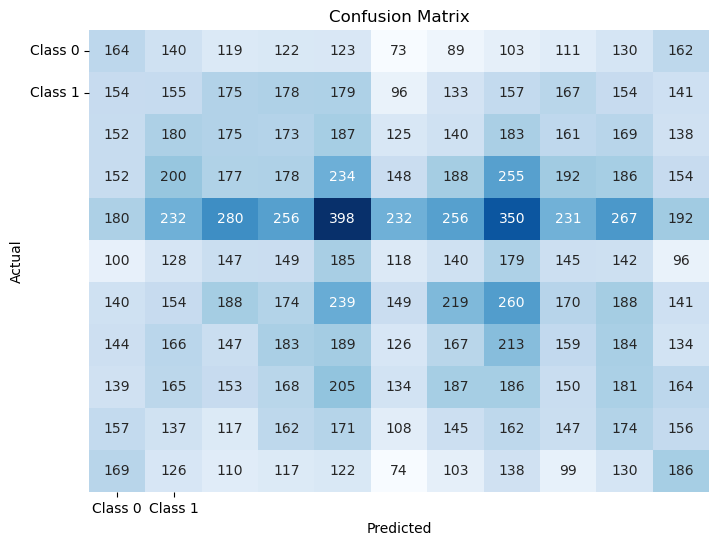

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


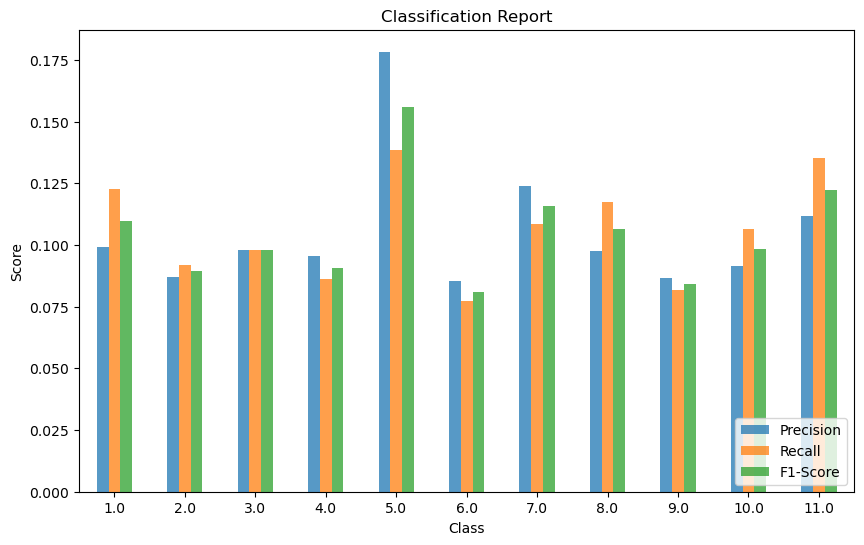

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
class_report = classification_report(y_test[:, 1], y_pred[:, 1], output_dict=True)

# Extract precision, recall, f1-score for each class
class_labels = [key for key in class_report.keys() if key not in ('accuracy', 'macro avg', 'weighted avg')]  # Get only class labels
precision = [class_report[label]['precision'] for label in class_labels]
recall = [class_report[label]['recall'] for label in class_labels]
f1 = [class_report[label]['f1-score'] for label in class_labels]

# Create a DataFrame for the classification report
class_report_df = pd.DataFrame({
    'Class': class_labels,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Set the class as index
class_report_df.set_index('Class', inplace=True)

# Plot the classification report
plt.figure(figsize=(10, 6))
class_report_df.plot(kind='bar', alpha=0.75, ax=plt.gca())
plt.title("Classification Report")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


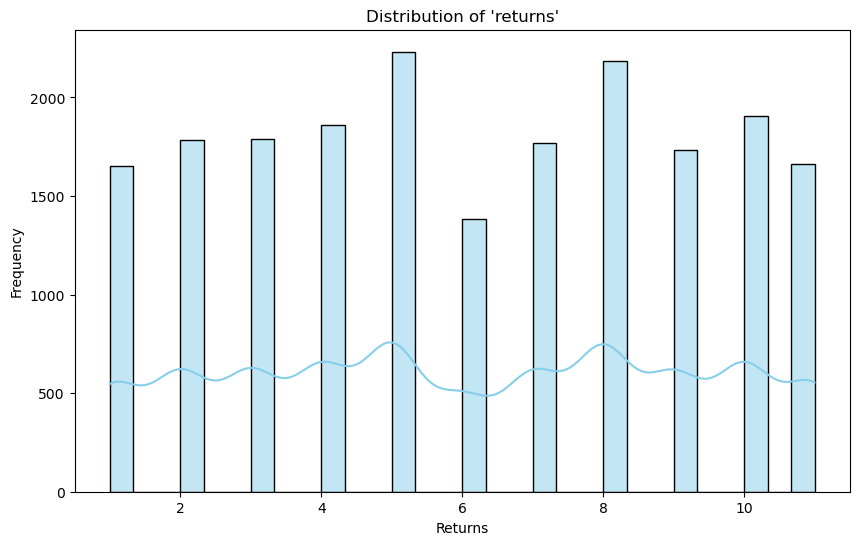

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'returns'
plt.figure(figsize=(10, 6))
sns.histplot(y_pred[:, 1], kde=True, bins=30, color='skyblue')  # histogram with KDE overlay
plt.title("Distribution of 'returns'")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()


In [60]:
u = pd.DataFrame((y_pred[:, 1] == y_test[:, 1]))
acc = u.value_counts().loc[True][0] / (u.value_counts().loc[True][0] + u.value_counts().loc[False][0])
print(f"correct group prediction = {acc}")

correct group prediction = 0.10676156583629894


In [61]:
resid = y_pred[:, 1] - y_test[:, 1]
# resid

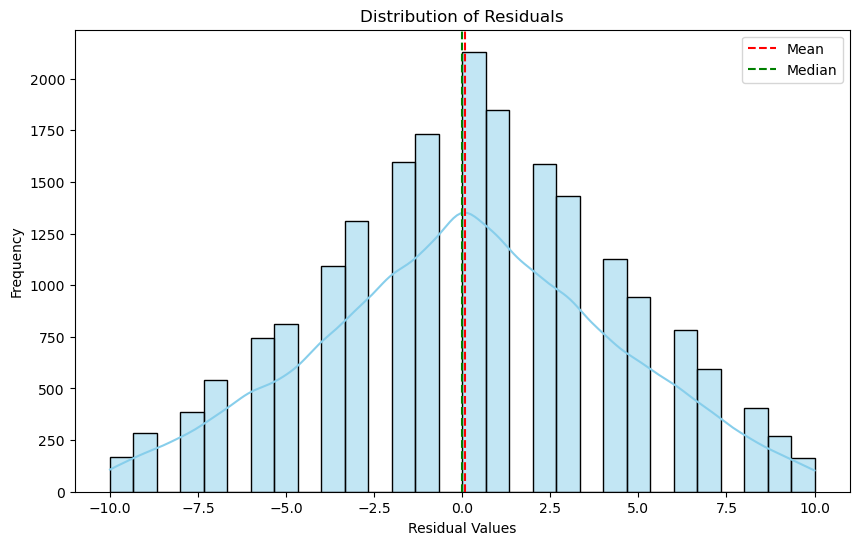

In [62]:
# Plotting the distribution of 'resid'
plt.figure(figsize=(10, 6))
sns.histplot(resid, kde=True, bins=30, color='skyblue')  # Histogram with KDE overlay
plt.title("Distribution of Residuals")
plt.xlabel("Residual Values")
plt.ylabel("Frequency")
plt.axvline(x=np.mean(resid), color='r', linestyle='--', label='Mean')  # Mean line
plt.axvline(x=np.median(resid), color='g', linestyle='--', label='Median')  # Median line
plt.legend()
plt.show()

In [63]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for Seaborn
results_df = pd.DataFrame({
    'True': y_test[:, 1],   # Actual labels
    'Predicted': y_pred[:, 1],     # Predicted labels
    'timestamp' : y_test[:, 0]
})

# # Melt the DataFrame for Seaborn
# melted_results = results_df.melt(var_name='Type', value_name='Class')

# # Create a count plot
# plt.figure(figsize=(10, 6))
# sns.countplot(data=melted_results, x='Class', hue='Type', palette=['blue', 'red'])
# plt.title('Count of True vs Predicted Class Labels')
# plt.xlabel('Class Labels')
# plt.ylabel('Count')
# plt.legend(title='Type')
# plt.show()



In [64]:
results_df['resid'] = resid
results_df

,True,Predicted,timestamp,resid
0,8.0,8.0,1.724167e+09,0.0
1,3.0,11.0,1.724167e+09,8.0
2,11.0,1.0,1.724167e+09,-10.0
3,1.0,10.0,1.724167e+09,9.0
4,3.0,1.0,1.724168e+09,-2.0
...,...,...,...,...
19946,11.0,8.0,1.727740e+09,-3.0
19947,9.0,10.0,1.727740e+09,1.0
19948,11.0,1.0,1.727740e+09,-10.0
19949,10.0,11.0,1.727740e+09,1.0


In [70]:
import numpy as np
class Portfolio:
     def __init__(self, value):
        self.trades = []
        self.value =  []
        # self.value.set_index("timestamp")

class TradingStrategy:
    def __init__(self, predictions, actual_returns):
        self.predictions = predictions  # 2D array with [timestamp, predicted_category]
        self.actual_returns = actual_returns  # 2D array with [timestamp, actual_return]
        self.position = None
        self.trades = []  # Store executed trades
        self.portfolio = []

    def execute_trade(self, timestamp, action):
        self.trades.append((timestamp, action))

    def monitor(self):
        for row in self.predictions.iterrows():
            timestamp, return_category = row[0], row[1]

            
            # Buy if return category is above 8
            if return_category >= 8 and self.position != 'buy':
                self.position = 'buy'
                self.execute_trade(timestamp, 'buy')
            
            # Sell if return category is below 3
            elif return_category <= 3 and self.position != 'sell':
                self.position = 'sell'
                self.execute_trade(timestamp, 'sell')
        return self.trades
    
    # def calculate_aggregated_return(self):
    #     aggregated_return = 1.0  # Start with an initial capital of 1
    #     last_timestamp = None

    #     for trade in self.trades:
    #         timestamp, action = trade
    #         if last_timestamp is not None:
    #             # Find the actual return for the last executed trade
    #             actual_return = self.get_actual_return(last_timestamp)
                
    #             if actual_return is None:
    #                 print(f"Warning: No actual return found for timestamp {last_timestamp}.")
    #                 continue  # Skip this trade if no actual return is found
                
    #             # Update the aggregated return based on the action
    #             if action == 'buy':
    #                 aggregated_return *= (1 + actual_return)  # Buy: we want to multiply our return
    #             elif action == 'sell':
    #                 aggregated_return *= (1 - actual_return)  # Sell: we lose the return

    #         last_timestamp = timestamp
        
    #     # Convert to percentage return
    #     return_percentage = (aggregated_return - 1) * 100
    #     return return_percentage
    def getPortfolio(self, prices):
        portfolio = Portfolio(0)
        # prices = prices.set_index('timestamp')
        
        for t in self.trades:
            price = prices[prices['timestamp'] == t[0]]['close']
            print("price", price)
            if len(portfolio.value) == 0 and t[1] == 'buy':
                portfolio.value.append((t[0], price))
            
            prev = portfolio.value[-1][1]

            if t[1] == "buy":
                curr = prev - price
                portfolio.value.append((t[0], curr))

            elif t[1] == "sell":
                curr = prev + price 
                portfolio.value.append((t[0], curr))
                
        self.portfolio = portfolio
        return portfolio.value

    def get_actual_return(self, timestamp):
        # Find the actual return corresponding to the given timestamp
        for row in self.actual_returns:
            if row[0] == timestamp:
                return row[1]  # Return the actual return
        return None  # Return None if not found



trading_strategy = TradingStrategy(results_df[['timestamp', 'Predicted']], y_test)
trades = trading_strategy.monitor()
# aggregated_return = trading_strategy.calculate_aggregated_return()

# ts = pd.DataFrame(trades)
trading_strategy.trades



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [69]:
# prices()

trading_strategy.getPortfolio(prices)
# [v[1] for v in val]
# portfolio = Portfolio(0)
#         # prices = prices.set_index('timestamp')
        
# for t in trading_strategy.trades:

#     if len(portfolio.trades) == 0 and t[1] == 'buy':
#         portfolio.value.loc[t[0]] = prices[prices['timestamp'] == t[0]]
#     else:
#         raise
#     if t[1] == "buy":
#         portfolio.value.loc[t[0]] = prices[prices['timestamp'] == t[0]]
#     elif t[1] == "sell":
#         portfolio.value.loc[t[0]] = -(prices[prices['timestamp'] == t[0]])
# val

[]

In [371]:
prices

,timestamp,close
0,1.710029e+09,68469.45
1,1.710029e+09,68468.90
2,1.710029e+09,68474.69
3,1.710029e+09,68459.92
4,1.710029e+09,68458.29
...,...,...
99837,1.727740e+09,63002.95
99838,1.727740e+09,63043.40
99839,1.727740e+09,63161.83
99840,1.727740e+09,63215.71


[          timestamp    close
 79891  1.724167e+09  59124.1,
        timestamp  close
 79891        0.0    0.0,
        timestamp  close
 79891        NaN    NaN
 79892        NaN    NaN,
           timestamp    close
 79893  1.724167e+09  59183.7,
        timestamp  close
 79893        0.0    0.0,
        timestamp  close
 79893        NaN    NaN
 79894        NaN    NaN,
           timestamp     close
 79896  1.724168e+09  59049.89,
        timestamp  close
 79896        0.0    0.0,
        timestamp  close
 79896        NaN    NaN
 79900        NaN    NaN,
           timestamp     close
 79906  1.724169e+09  58858.17,
        timestamp  close
 79906        0.0    0.0,
        timestamp  close
 79906        NaN    NaN
 79911        NaN    NaN,
           timestamp    close
 79914  1.724170e+09  58799.4,
        timestamp  close
 79914        0.0    0.0,
        timestamp  close
 79914        NaN    NaN
 79915        NaN    NaN,
           timestamp     close
 79917  1.724170e+09  586

In [343]:
trade_prices = prices.merge(ts, left_on='timestamp', right_on=0, how='inner')
trade_prices.drop(columns=[0], inplace=True)
trade_prices

,timestamp,close,1
0,1.724167e+09,59124.10,buy
1,1.724167e+09,59097.48,sell
2,1.724167e+09,59183.70,buy
3,1.724168e+09,59040.71,sell
4,1.724168e+09,59049.89,buy
...,...,...,...
4654,1.727733e+09,63719.50,buy
4655,1.727735e+09,63627.12,sell
4656,1.727737e+09,63421.56,buy
4657,1.727738e+09,63502.45,sell


In [264]:
import pandas as pd

# # Sample DataFrame
# data = {
#     'timestamp': [1699027200, 1699034400, 1699142400, 1699153200, 1699171200],
#     'close_price': [100, 102, 101, 105, 104],
#     'signal': ['buy', 'sell', 'buy', 'sell', None]
# }

# df = pd.DataFrame(data)

def calculate_net_profit(df):
    total_profit = 0
    shares = 0
    buy_price = 0

    for index, row in df.iterrows():
        signal = row[1]
        price = row['close']

        if signal == 'buy':
            # If buying, track the price and increase the shares
            if shares == 0:  # Buy only if not already holding
                buy_price = price
                shares += 1  # Assume buying one share for simplicity

        elif signal == 'sell':
            # If selling, calculate profit and reset shares
            if shares > 0:  # Sell only if holding shares
                profit = price - buy_price  # Profit per share
                total_profit += profit
                shares -= 1  # Assume selling one share for simplicity

    return total_profit

# Calculate the net profit
net_profit = calculate_net_profit(trade_prices)
print(f'Net Profit: ${net_profit:.2f}')


Net Profit: $31541.80


In [267]:
trade_prices[1].value_counts()

1
buy     2330
sell    2329
Name: count, dtype: int64

In [268]:
trade_prices

,timestamp,close,1
0,1.724167e+09,59124.10,buy
1,1.724167e+09,59097.48,sell
2,1.724167e+09,59183.70,buy
3,1.724168e+09,59040.71,sell
4,1.724168e+09,59049.89,buy
...,...,...,...
4654,1.727733e+09,63719.50,buy
4655,1.727735e+09,63627.12,sell
4656,1.727737e+09,63421.56,buy
4657,1.727738e+09,63502.45,sell


In [270]:


def track_portfolio(trade_prices):
    # Initialize variables
    cash = 10000  # Starting with a cash value of $10,000
    portfolio_value = []
    shares = 0  # Number of shares currently held

    # Iterate through the DataFrame
    for index, row in xd.iterrows():
        timestamp = row['timestamp']
        close_price = row['close']
        signal = row[1]

        if signal == 'buy':
            # Buy shares with all available cash
            shares += cash // close_price  # Buy as many shares as possible
            cash -= shares * close_price  # Deduct cash used for buying
        elif signal == 'sell':
            # Sell all shares
            cash += shares * close_price  # Cash from selling shares
            shares = 0  # Set shares to 0 after selling

        # Calculate current portfolio value
        current_value = cash + shares * close_price
        portfolio_value.append((timestamp, current_value))

    # Create a DataFrame for the portfolio value over time
    portfolio_df = pd.DataFrame(portfolio_value, columns=['timestamp', 'portfolio_value'])
    return portfolio_df

# Example usage
# trade_prices should be your DataFrame with timestamp, close, and buy/sell columns
# trade_prices = pd.DataFrame({
#     'timestamp': [1699027200, 1699034400, 1699142400],  # Example timestamps
#     'close': [100, 105, 102],  # Example close prices
#     'buy/sell': ['buy', 'sell', 'buy']  # Example signals
# })

portfolio_over_time = track_portfolio(trade_prices)
print(portfolio_over_time)

         timestamp  portfolio_value
0     1.724167e+09          10000.0
1     1.724167e+09          10000.0
2     1.724167e+09          10000.0
3     1.724168e+09          10000.0
4     1.724168e+09          10000.0
...            ...              ...
4654  1.727733e+09          10000.0
4655  1.727735e+09          10000.0
4656  1.727737e+09          10000.0
4657  1.727738e+09          10000.0
4658  1.727740e+09          10000.0

[4659 rows x 2 columns]


In [271]:
trade_prices

,timestamp,close,1
0,1.724167e+09,59124.10,buy
1,1.724167e+09,59097.48,sell
2,1.724167e+09,59183.70,buy
3,1.724168e+09,59040.71,sell
4,1.724168e+09,59049.89,buy
...,...,...,...
4654,1.727733e+09,63719.50,buy
4655,1.727735e+09,63627.12,sell
4656,1.727737e+09,63421.56,buy
4657,1.727738e+09,63502.45,sell
